# Introduction to Forecasting


### <font color=blue>Simple Exponential Smoothing / Simple Moving Average</font>
This is the simplest to forecast. $\hat{y}$ is equal to the most recent value in the dataset, and the forecast plot is simply a horizontal line extending from the most recent value.
### <font color=blue>Double Exponential Smoothing / Holt's Method</font>
This model takes trend into account. Here the forecast plot is still a straight line extending from the most recent value, but it has slope.
### <font color=blue>Triple Exponential Smoothing / Holt-Winters Method</font>
This model has (so far) the "best" looking forecast plot, as it takes seasonality into account. When we expect regular fluctuations in the future, this model attempts to map the seasonal behavior.

In [9]:
import numpy as np
import pandas as pd

In [10]:
df=pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [11]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [12]:
df.index.freq='MS'

In [13]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [14]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [15]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


### Here we notice the dataset goes upto December 1960. So forecasting should be made in the early 1960, like 2 to 3 yrs ahead like ex.1962,1965

## Performing the Train Test Split.

#### The train test split is indexing command.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [17]:
train_data= df.iloc[:109] # give rows 0 -->108
test_data= df.iloc[108:] # give rows 109 -->last

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 109 entries, 1949-01-01 to 1958-01-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  109 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [19]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 1958-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


## Fitting the Model to the Train Data

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [21]:
fitted_model= ExponentialSmoothing(train_data['Thousands of Passengers'],
                                   trend='mul',
                                  seasonal='mul',
                                  seasonal_periods=12).fit()

### Forecast on test Data

In [22]:
test_predictions = fitted_model.forecast(48) # forecasting 3yrs of future

In [23]:
test_predictions

1958-02-01    339.137622
1958-03-01    399.272453
1958-04-01    394.220606
1958-05-01    402.536027
1958-06-01    473.133366
1958-07-01    521.802945
1958-08-01    514.531957
1958-09-01    446.226218
1958-10-01    385.432456
1958-11-01    339.645779
1958-12-01    381.448514
1959-01-01    401.209020
1959-02-01    387.152183
1959-03-01    455.800806
1959-04-01    450.033726
1959-05-01    459.526432
1959-06-01    540.118829
1959-07-01    595.678969
1959-08-01    587.378566
1959-09-01    509.402210
1959-10-01    440.001365
1959-11-01    387.732284
1959-12-01    435.453383
1960-01-01    458.011549
1960-02-01    441.964567
1960-03-01    520.332353
1960-04-01    513.748779
1960-05-01    524.585447
1960-06-01    616.587986
1960-07-01    680.014242
1960-08-01    670.538680
1960-09-01    581.522557
1960-10-01    502.296052
1960-11-01    442.626798
1960-12-01    497.104174
1961-01-01    522.856089
1961-02-01    504.537202
1961-03-01    594.000172
1961-04-01    586.484507
1961-05-01    598.855413


# Plotting

## Plotting the training and testing data

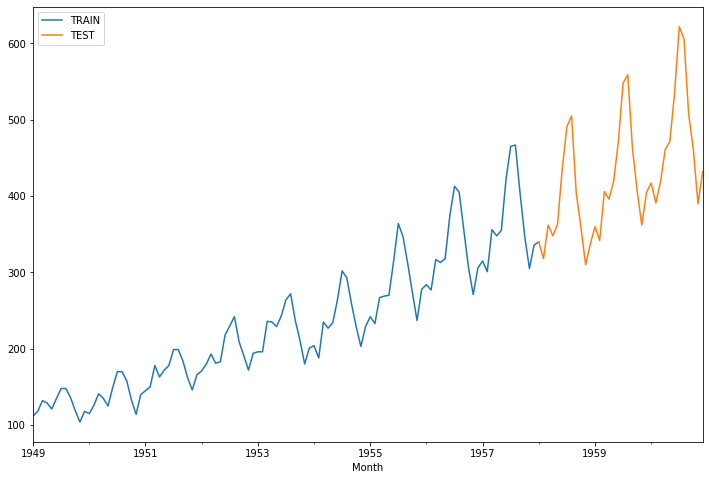

In [24]:
train_data['Thousands of Passengers'].plot(legend=True,label="TRAIN",figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label="TEST",figsize=(12,8))

### Plotting the Prediction Data.

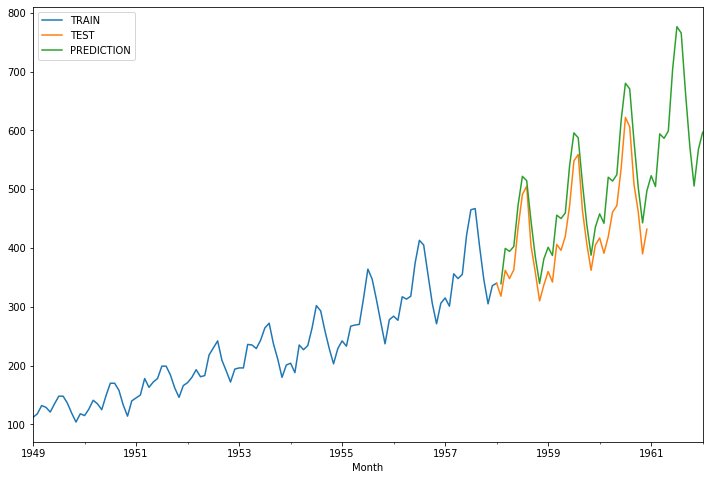

In [25]:
train_data['Thousands of Passengers'].plot(legend=True,label="TRAIN",figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label="TEST",figsize=(12,8))
test_predictions.plot(legend=True,label="PREDICTION",figsize=(12,8))

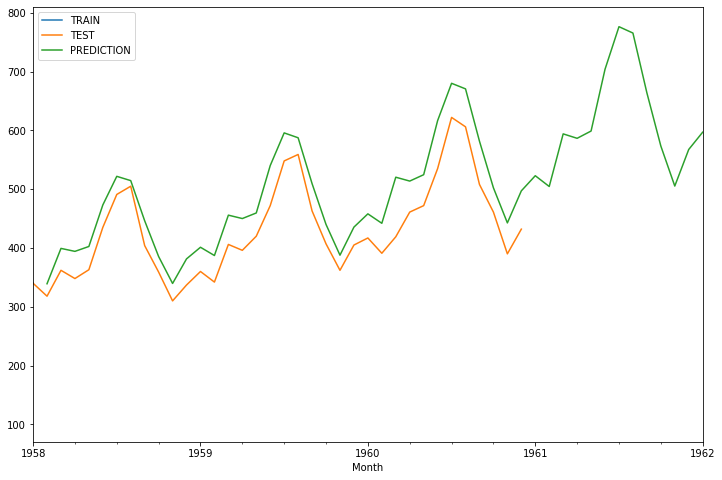

In [27]:
train_data['Thousands of Passengers'].plot(legend=True,label="TRAIN",figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label="TEST",figsize=(12,8))
test_predictions.plot(legend=True,label="PREDICTION",xlim=['1958-01-01','1962-01-01'])

# Evaluating Forecast Prediction

### Common Evaluation metrics for regression for continous values are:
    1.  Mean Absolute Error
    2.  Mean Squared Error
    3.  Root Mean Square Error

### for time series dataset we are predicting on continous values so these are used for continous values

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

#### Check the average values of test data
<strong>
mean -->428.500000

RMSE value can be compared to std deviation(std) to know better on model.

In [32]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


### Mean Absolute Error 

In [30]:
mean_absolute_error(test_data,test_predictions)

63.0282862810754

### Mean Squared Error 

In [31]:
mean_squared_error(test_data,test_predictions)

5613.837862455122

### Root Mean Squared Error

#### Compare the RMSE to the standard Deviation.

In [33]:
np.sqrt(mean_squared_error(test_data,test_predictions))

74.92554879648945

# Forecast for Future datas

#### Those data that is not present in the data set.

#### For this we need to fit the model to the entire dataset and not only the training data.

In [29]:
final_model= ExponentialSmoothing(df['Thousands of Passengers'],
                                   trend='mul',
                                  seasonal='mul',
                                  seasonal_periods=12).fit()

In [30]:
forecast_predictions= final_model.forecast(48)

# Plotting the Real Entire data with Predictions.

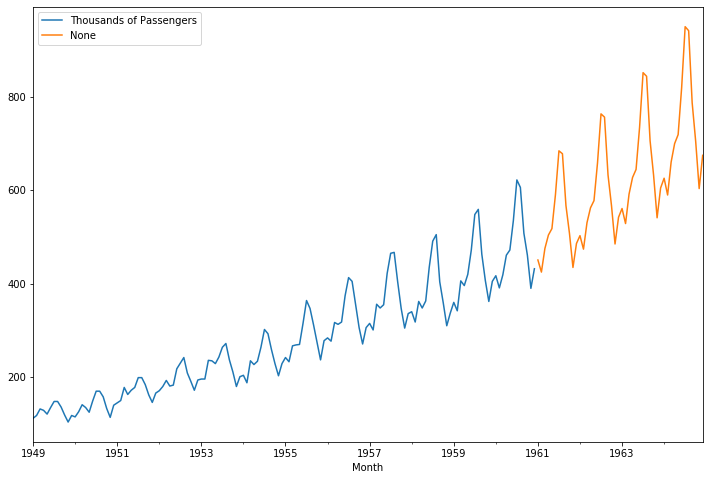

In [31]:
df['Thousands of Passengers'].plot(figsize=(12,8),legend='Real Data')
forecast_predictions.plot(figsize=(12,8),legend='Forecasted data')